# Partie IV : Une étude plus globale des dépêches 

In [28]:
import pandas as pd
data = pd.read_csv("abcnews-date-text.csv")

# Print the data
print(data)


         publish_date                                      headline_text
0            20030219  aba decides against community broadcasting lic...
1            20030219     act fire witnesses must be aware of defamation
2            20030219     a g calls for infrastructure protection summit
3            20030219           air nz staff in aust strike for pay rise
4            20030219      air nz strike to affect australian travellers
...               ...                                                ...
1244179      20211231  two aged care residents die as state records 2...
1244180      20211231  victoria records 5;919 new cases and seven deaths
1244181      20211231    wa delays adopting new close contact definition
1244182      20211231  western ringtail possums found badly dehydrate...
1244183      20211231  what makes you a close covid contact here are ...

[1244184 rows x 2 columns]


In [29]:
# Transformer la date
data['publish_date'] = pd.to_datetime(data['publish_date'], format='%Y%m%d')

In [30]:
data.head()

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download the required resources
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

# Define the corpus and cleaning function
def corpus_and_cleaning(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join the tokens back into a string
    cleaned_text = ' '.join(lemmatized_tokens)
    
    return cleaned_text

In [32]:
# Apply the corpus and cleaning function to the 'headline_text' column
data['headline_text_cleaned'] = data['headline_text'].apply(corpus_and_cleaning)

# Print the cleaned data
print(data['headline_text_cleaned'])


KeyboardInterrupt: 

# Statistiques sur les fréquences des mots

In [ ]:
# Compter le nombre d'occurences de chaque mot
word_counts = data['headline_text_cleaned'].str.split(expand=True).stack().value_counts()

# Calculer les statistiques descriptives 
maximum = word_counts.max()
minimum = word_counts.min()
mean = word_counts.mean()
variance = word_counts.var()
median = word_counts.median()
quantiles = word_counts.quantile([0.25, 0.5, 0.75])

# Renvoyer les résultats
print("Maximum:", maximum)
most_common_word = word_counts.idxmax()
print("The word with the highest number of iterations is:", most_common_word)
print("Mean:", mean)
print("Variance:", variance)
print("Median:", median)
print("Quantiles:", quantiles)



Maximum: 39857
The word with the highest number of iterations is: police
Mean: 69.10543950951735
Variance: 282681.3139223098
Median: 2.0
Quantiles: 0.25     1.0
0.50     2.0
0.75    10.0
dtype: float64


## Wordcloud

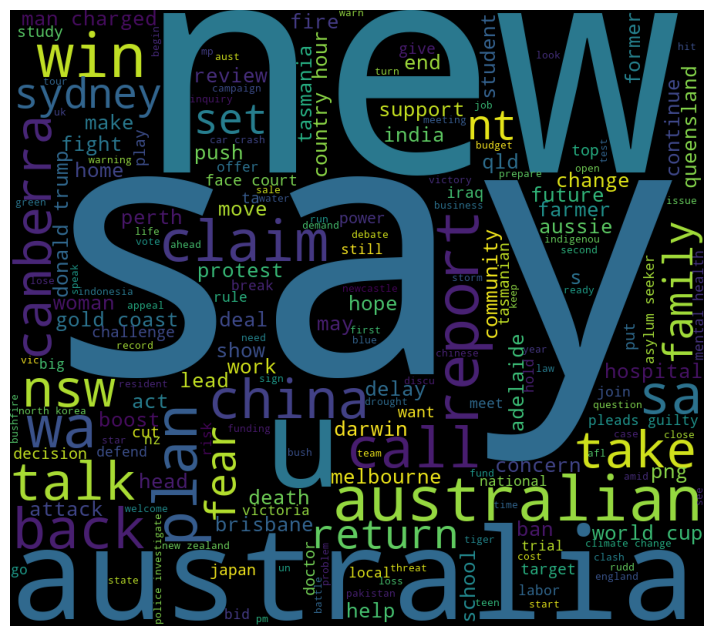

In [ ]:
import matplotlib.pyplot as plt

# Affichage du WordCloud
# Génération du WordCloud avec des dimensions plus grandes
wordcloud = WordCloud(width=900, height=800, margin=0).generate(data['headline_text_cleaned'].str.cat(sep='\n'))

# Affichage du WordCloud agrandi
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
iteration_new = word_counts['police']
print("Number of iterations of 'police':", iteration_new)


Number of iterations of 'police': 39857


In [ ]:
top_30_words = word_counts.nlargest(30
                                )
print(top_30_words)


police        39857
new           33734
man           31809
say           28906
u             20627
australia     20239
call          19634
plan          19480
council       19366
court         18559
fire          18256
govt          17104
win           16733
nsw           16577
back          16297
australian    16243
interview     16199
woman         16042
death         15598
crash         14143
sydney        13755
wa            13505
year          13487
water         13458
report        13062
get           12625
qld           12602
face          12288
health        11986
day           11903
dtype: int64


### mot geographique (qld, australia, etc)
### mot commun (year, day,man...)
### mot lié à la politique(govt, court, police, council...)

# Evolution de la présence d'un mot au fil des années

In [ ]:
data.head()

,publish_date,headline_text,headline_text_cleaned
0,1970-01-01 00:00:00.020030219,aba decides against community broadcasting lic...,aba decides community broadcasting licence
1,1970-01-01 00:00:00.020030219,act fire witnesses must be aware of defamation,act fire witness must aware defamation
2,1970-01-01 00:00:00.020030219,a g calls for infrastructure protection summit,g call infrastructure protection summit
3,1970-01-01 00:00:00.020030219,air nz staff in aust strike for pay rise,air nz staff aust strike pay rise
4,1970-01-01 00:00:00.020030219,air nz strike to affect australian travellers,air nz strike affect australian traveller


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def evolution_mot(mot, data):
    # Filter the data for the specified word
    word_data = data[data['headline_text'].str.contains(mot)]
    
    # Group the data by year and count the occurrences of the word
    word_counts = word_data.groupby(data['publish_date'].dt.year)['headline_text'].count()
    
    # Plot the evolution of the word frequency
    word_counts.plot(kind='line', figsize=(10, 6))
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.title(f'Evolution of the Frequency of "{mot}" over the Years')
    plt.show()
    


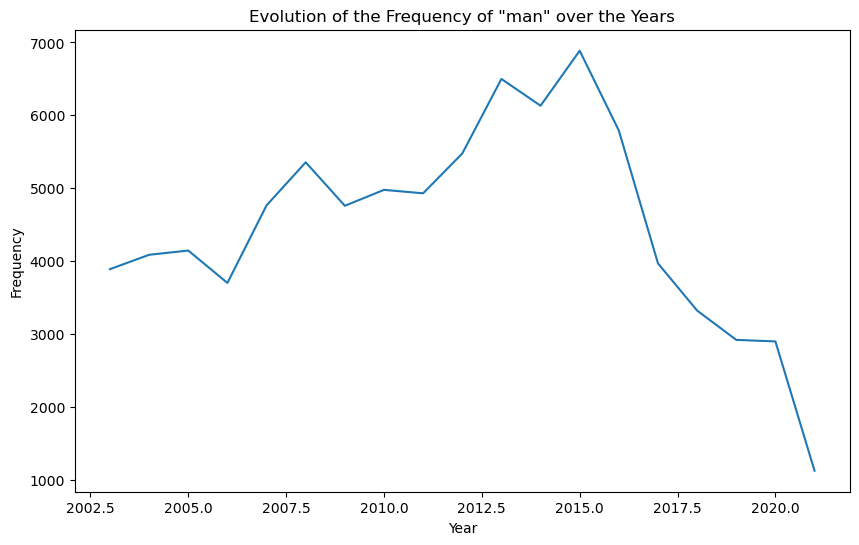

In [ ]:
evolution_mot('man', data)

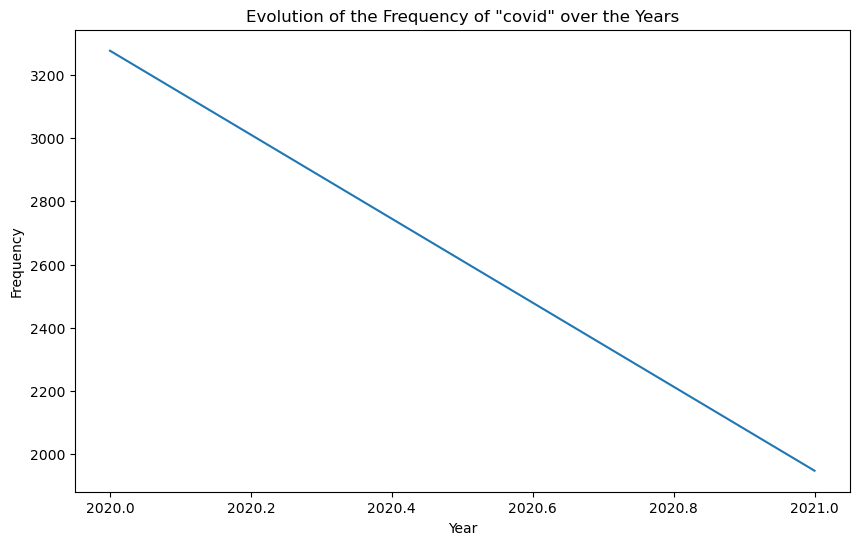

In [ ]:
# Call the evolution_mot function
evolution_mot('covid', data)

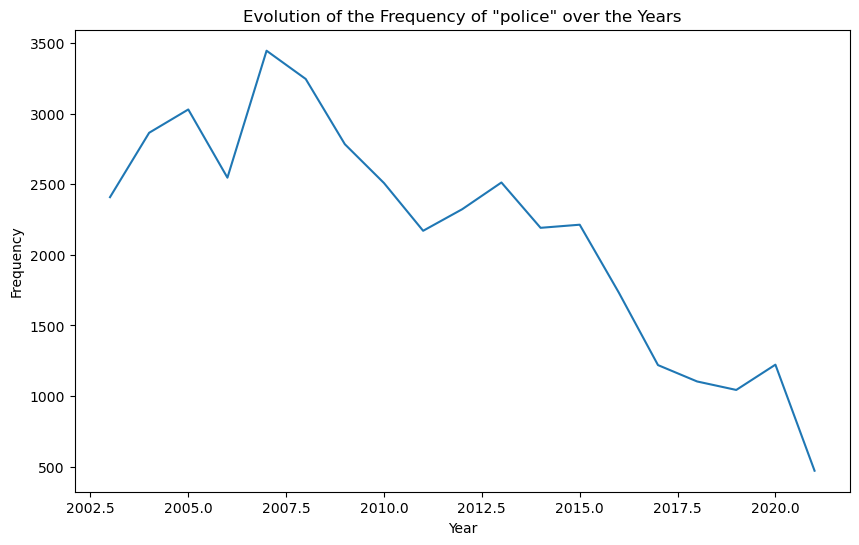

In [ ]:
evolution_mot('police', data)

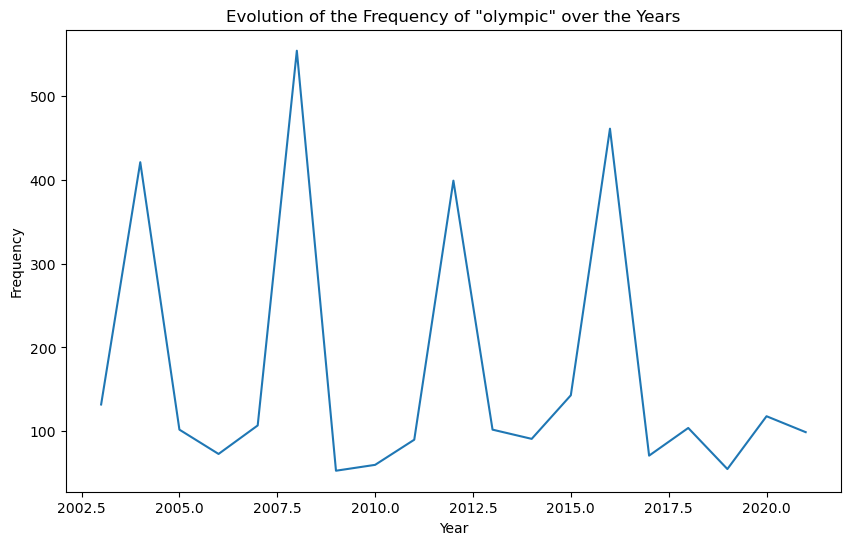

In [ ]:
evolution_mot('olympic', data)

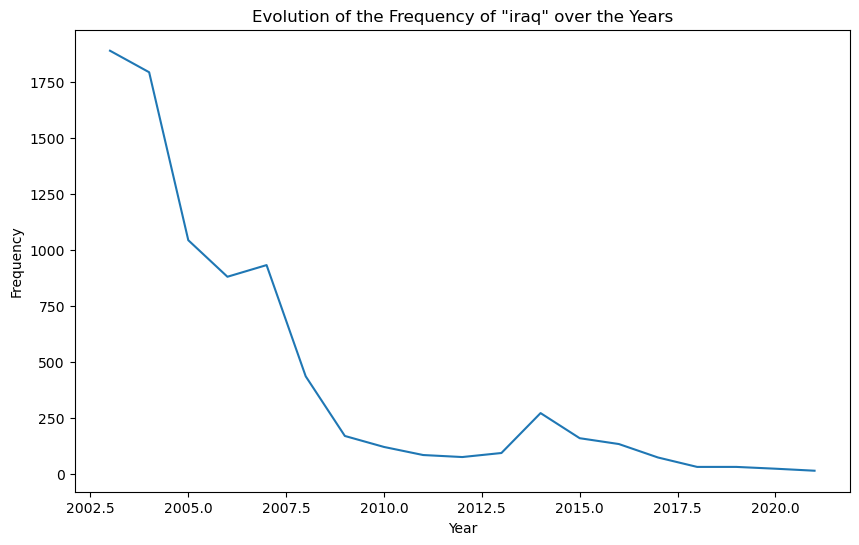

In [ ]:
evolution_mot('iraq', data)

# LDA

In [34]:
#import
import pandas as pd

data=pd.read_csv("abcnews-date-text_cleaned.csv")

In [36]:
data.dropna(subset=['headline_text_cleaned'], inplace=True)


In [35]:
data.isna().sum()

publish_date             0
headline_text            0
headline_text_cleaned    9
dtype: int64

In [ ]:
#imports
import pyLDAvis
import pyLDAvis.gensim
import gensim
from gensim.utils import simple_preprocess
from gensim import models
from gensim import corpora

In [ ]:
def generate_lda_visualization(year,n_topics):
    # Filter the data for the specified year
    data['publish_date'] = pd.to_datetime(data['publish_date'], format='%Y/%m/%d')
    headlines = pd.DataFrame(data[(data['publish_date'] > f'{year}/01/01') & (data['publish_date'] < f'{year}/12/31')]['headline_text_cleaned'])
    texts = headlines['headline_text_cleaned'].apply(simple_preprocess)

    dictionary = corpora.Dictionary(texts)
    dictionary.filter_extremes(no_below=5, no_above=0.5)

    corpus = [dictionary.doc2bow(text) for text in texts]


    lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)

    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
    vis.title = f"LDA Visualization{year}"
    pyLDAvis.save_html(vis, f'LDAVisualization{year}.html')

    vis
    return vis

In [37]:
for i in range(2011,2021,1):
    generate_lda_visualization(i,3)